FileUpload(value={}, accept='image/*', description='Upload')

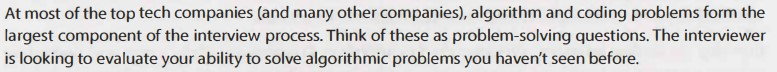

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected Text:
Atmost ofthe top tech companies (and many other companies), algorithm and coding problems form the
largest component of the interview process Think of these as problem-solving questions The interviewer
looking to evaluate your ability to solve algorithmic problems you haven't seen before:


In [ ]:
!pip install easyocr opencv-python-headless ipywidgets

import cv2
import easyocr
import io
import numpy as np
from PIL import Image as PILImage
from IPython.display import display
from ipywidgets import FileUpload

def perform_text_detection(image):
    # Convert uploaded image data to OpenCV format
    img_np = np.array(image)
    img_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

    # Initialize EasyOCR reader
    reader = easyocr.Reader(['en'])

    # Perform text detection
    output = reader.readtext(img_cv)

    return output

def on_upload_change(change):
    # Get uploaded image data
    uploaded_image = change['new']

    # Check if the upload contains any files
    if uploaded_image:
        # Get the first uploaded file (assuming only one file is uploaded)
        file_name, file_data = uploaded_image.popitem()

        # Read the content of the uploaded file
        img = PILImage.open(io.BytesIO(file_data['content']))
        display(img)

        # Perform text detection on the uploaded image
        detected_text = perform_text_detection(img)

        # Display the detected text
        print("Detected Text:")
        for text in detected_text:
            print(text[1])  # Display the detected text

# Create a FileUpload widget
uploader = FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')

# Display the uploader widget
display(uploader)
